## **Coursework 1**

Miguel de Llanza Varona

CardNo: 234717

In [50]:
# -*- coding: utf-8 -*-
"""Coursework 1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1D34GSeEHAvOsp-uwOXqF6dTQ8FJotRMB
"""

from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import product
#%matplotlib qt

## A) DERIVATIVES AND THEIR USE

Question 3.b)

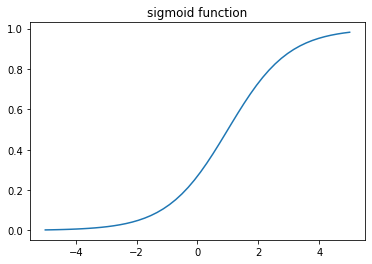

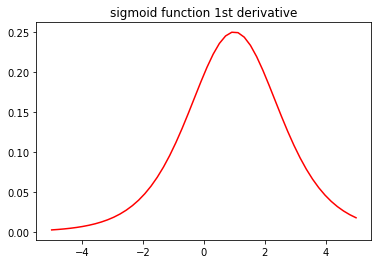

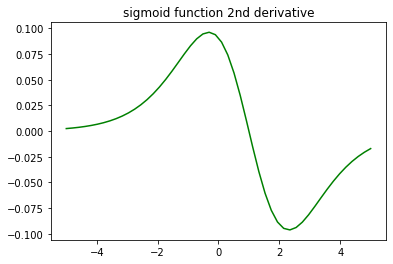

In [63]:
"""
Plot the sigmoid function, its first and second derivatives
"""
def sigmoid(x, m, x0):
  return 1 / (1 + np.exp(-m * (x - x0)))

def sigmoid_1st_der(x, m, x0):
  return sigmoid(x, m, x0) * (1 - sigmoid(x, m, x0)) * m

def sigmoid_2nd_der(x, m, x0):
  return m * (sigmoid_1st_der(x, m, x0) - (2 * sigmoid(x, m, x0) * sigmoid_1st_der(x, m, x0) * m))

# Since 'm' defines the gradient of the function, for values of m greater than 1, 
# the slope gets steeper until the function turns into a step function (there is 
# no transition between the two stationary regions of the function). On the contrary,
# for values of m less than 1, the function behaves similarly as a linear function
# until m = 0, where there is no rate of change, and the value of the function
# becomes independent of x (function is constant)
m = 1

# x0 shifts the function to the right for values greater than 1, and to the
# left for values less than 1
x0 = 1

xs1 = np.linspace(-5,5)
ys1 = [sigmoid(x, m, x0) for x in xs1]
plt.plot(xs1, ys1)
plt.title('sigmoid function')
plt.show()

xs2 = np.linspace(-5,5)
ys2 = [sigmoid_1st_der(x, m, x0) for x in xs2]
plt.plot(xs2, ys2, 'r')
plt.title('sigmoid function 1st derivative')
plt.show()

xs3 = np.linspace(-5,5)
ys3 = [sigmoid_2nd_der(x, m, x0) for x in xs3]
plt.plot(xs3, ys3, 'g')
plt.title('sigmoid function 2nd derivative')
plt.show()

## B) GRADIENT ASCENT AND HILL-CLIMBING

In [3]:
# Definition of Complex landscape
def ComplexLandscape(x, y):
    return 4*(1-x)**2*np.exp(-(x**2)-(y+1)**2) -15*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) -(1./3)*np.exp(-(x+1)**2 - y**2)-1*(2*(x-3)**7 -0.3*(y-4)**5+(y-3)**9)*np.exp(-(x-3)**2-(y-3)**2)

# Definition of gradient of Complex landscape
def ComplexLandscapeGrad(x, y):
    g = np.zeros(2)
    g[0]=-8* np.exp(-(x**2)-(y+1)**2)*((1-x)+x*(1-x)**2)-15* np.exp(-x**2-y**2)*((0.2-3*x**2) -2*x*(x/5 - x**3 - y**5)) +(2./3)*(x+1)* np.exp(-(x+1)**2 - y**2)-1* np.exp(-(x-3)**2-(y-3)**2)*(14*(x-3)**6-2*(x-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    g[1]=-8*(y+1)*(1-x)**2* np.exp(-(x**2)-(y+1)**2) -15* np.exp(-x**2-y**2)*(-5*y**4 -2*y*(x/5 - x**3 - y**5)) +(2./3)*y* np.exp(-(x+1)**2 - y**2)-1* np.exp(-(x-3)**2-(y-3)**2)*((-1.5*(y-4)**4+9*(y-3)**8)-2*(y-3)*(2*(x-3)**7-0.3*(y-4)**5+(y-3)**9))
    return g
    
# Definition of Simple landscape
def SimpleLandscape(x, y):
    return np.where(1-np.abs(2*x)>0,1-np.abs(2*x)+x+y,x+y)
    
# Definition of gradient of Simple landscape
def SimpleLandscapeGrad(x, y):
    g = np.zeros(2)
    if 1 - np.abs(2 * x) > 0:
        if x < 0:
            g[0] = 3
        elif x == 0:
            g[0] = 0
        else:
            g[0] = -1
    else:
        g[0] = 1
    g[1] = 1
    return g

# Function to draw a surface (equivalent to ezmesh in Matlab)
# See argument cmap of plot_surface instruction to adjust color map (if so desired)
def DrawSurface(fig, varxrange, varyrange, function):
    """Function to draw a surface given x,y ranges and a function."""
    ax = fig.gca(projection='3d')
    xx, yy = np.meshgrid(varxrange, varyrange, sparse=False)
    z = function(xx, yy)
    # set alpha to 0.7 in order to see more clearly each new point updated by 
    # each algorithm
    ax.plot_surface(xx, yy, z, cmap='RdBu', alpha=0.7) # color map can be adjusted, or removed! 
    fig.canvas.draw()
    return ax

# Function implementing gradient ascent
def GradAscent(StartPt,NumSteps,LRate, global_max, land='simple', plot=True):
    # there are some print statements about that gives information about the
    # running process of the algorithm but they are commented because I only
    # use them to check that everything is running as expected

    PauseFlag = 1
    # define the default result if gradient ascent never converges to the 
    # global maximum given the starting point
    result = (0, NumSteps)

    # depending on the land selected, it is defined its corresponding function,
    # gradient, and lower and upper bounds
    if land == 'simple':
      landscape = SimpleLandscape
      gradient = SimpleLandscapeGrad
      lower_bound = [-2,-2]
      upper_bound = [2,2]

    elif land == 'complex':
      landscape = ComplexLandscape
      gradient = ComplexLandscapeGrad
      lower_bound = [-3,-3]
      upper_bound = [7,7]

    else:
      return 'Invalid landscape. Type \'simple\' or \'complex\'.'
    
    # if plot is set to True, then the landscape will be plotted
    if plot:
        plt.ion()
        fig = plt.figure()
        xs = np.arange(lower_bound[0], upper_bound[0] + 0.025, 0.025)
        ys = np.arange(lower_bound[1], upper_bound[1] + 0.025, 0.025)
        ax = DrawSurface(fig, xs, ys, landscape)
    
    #print('Landscape Selected: ', land)
    #print('Executing Gradient Ascent...')
    
    init_height = landscape(StartPt[0], StartPt[1])

    for i in range(NumSteps):
        #print('Iteration', i)
        
        x, y = StartPt[0], StartPt[1]
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        height_start = landscape(x, y)

        if plot:
            # TO DO: Plot point on the landscape 
            # Use a markersize that you can see well enough (e.g., * in size 10)
            ax.plot([x], [y], height_start, color='black' ,marker='o', markersize=8)
            
        # TO DO: Calculate the gradient at StartPt using SimpleLandscapeGrad or ComplexLandscapeGrad
        grad = gradient(x, y)

        # TO DO: Calculate the new point and update StartPt
        new_point = StartPt + LRate * grad
        StartPt = new_point

        # Ensure StartPt is within the specified bounds (un/comment relevant lines)
        StartPt = np.maximum(StartPt,lower_bound)
        StartPt = np.minimum(StartPt,upper_bound)
            
        # If plot is set to true, then it pauses to view output
        if plot:
            if PauseFlag:
                wfbp = plt.waitforbuttonpress()
            
        # Break out the loop if the maximum is reached (only for the simple
        # landscape, since in the complex one we are mainly interested in the 
        # height reached, even if it is not the global maximum
        if land == 'simple':
            if landscape(StartPt[0], StartPt[1]) == round(global_max):
                result = (1, i)
                break

    # Once out the loop, results depending on the landscape selected are returned
    # I make the distinction between landscapes becasue in the simple we want to check
    # the number of iterations, while in the complex we are interested in the height 
    # reached
    if land == 'simple':
        if result[0] == 1:
            #print('Global maximum reached in', i, 'iterations')
            return result
        
        else:
            #print('Global maximum not reached')
            return result
    
    else:
        height = landscape(StartPt[0], StartPt[1])
        #print('Initial height:', init_height)
        #print('Final height:', height)
        #print('Distance climbed', height - init_height)
        return (NumSteps, height)



# Returns a mutated point given the old point and the range of mutation
def Mutate(OldPt,MaxMutate):
    # TO DO: Select a random distance MutDist to mutate in the range (-MaxMutate,MaxMutate)
    MutDist = np.random.uniform(low=np.nextafter(-MaxMutate, np.inf), high=MaxMutate)
    # TO DO: Randomly choose which element of OldPt to mutate and mutate by MutDist
    # I create a random vector that takes two values: zero or a value in the range
    # defined by the mutation distance. Since zero is the neutral value in the sum,
    # once the sum between the old point and the random vector is done, only one 
    # of the dimensions will have been randomly chosen to be mutated 
    MutatedPt = OldPt + np.random.choice([0, MutDist], size=2, replace=False)

    return MutatedPt

# Function implementing hill climbing
def HillClimb(StartPt,NumSteps,MaxMutate, global_maximum, land='simple', plot=True):
    # Same as in gradient ascent, there are some print statements about that gives 
    # information about the running process of the algorithm but they are commented 
    # because I only use them to check that everything is running as expected

    # define the default result if gradient ascent never converges to the 
    # global maximum given the starting point
    PauseFlag = 1   
    result = (0, NumSteps)

    # depending on the land selected, it is defined its corresponding function,
    # gradient, and lower and upper bounds
    if land == 'simple':
      landscape = SimpleLandscape
      lower_bound = [-2,-2]
      upper_bound = [2,2]

    elif land == 'complex':
      landscape = ComplexLandscape
      lower_bound = [-3,-3]
      upper_bound = [7,7]

    else:
      return 'Invalid landscape. Type \'simple\' or \'complex\'.'
    
    # If plot is set to True, then the landscape will be plotted
    if plot:
        plt.ion()
        fig = plt.figure()
        xs = np.arange(lower_bound[0], upper_bound[0] + 0.025, 0.025)
        ys = np.arange(lower_bound[1], upper_bound[1] + 0.025, 0.025)
        ax = DrawSurface(fig, xs, ys, landscape)
        
    #print('Landscape Selected: ', land)
    #print('Executing Hill Climb...')
    
    init_height = landscape(StartPt[0], StartPt[1])

    for i in range(NumSteps):
        #print('Iteration', i)

        x, y = StartPt[0], StartPt[1]
        
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        height_start = landscape(x, y)

        
        if plot:
            # TO DO: Plot point on the landscape 
            # Use a markersize that you can see well enough (e.g., * in size 10)
            ax.plot([x], [y], height_start, color='black', marker='o', markersize=8)
            
        # Mutate StartPt into NewPt
        NewPt = Mutate(np.copy(StartPt),MaxMutate) # Use copy because Python passes variables by references (see Mutate function)
        
        # Ensure NewPt is within the specified bounds (un/comment relevant lines)
        NewPt = np.maximum(NewPt,lower_bound)
        NewPt = np.minimum(NewPt,upper_bound)
           
        # TO DO: Calculate the height of the new point
        height_new = landscape(NewPt[0], NewPt[1])
                
        # TO DO: Decide whether to update StartPt or not
        if height_new > height_start:
            StartPt = NewPt
            
        else:
            continue
        
        # If plot is set to true, then it pauses to view output
        if plot:
            if PauseFlag:
                wfbp = plt.waitforbuttonpress()

        # Break out the loop if the maximum is reached (only for the simple
        # landscape, since in the complex one we are mainly interested in the 
        # height reached, even if it is not the global maximum
        if land == 'simple':
            if landscape(StartPt[0], StartPt[1]) == round(global_maximum):
                result = (1, i)
                break

    # As in gradient ascent, once out the loop, results depending on the landscape
    # selected are returned 
    if land == 'simple':
        if result[0] == 1:
            #print('Global maximum reached in', i, 'iterations')
            return result
        
        else:
            #print('Global maximum not reached')
            return result
    
    else:
        height = landscape(StartPt[0], StartPt[1])
        #print('Initial height:', init_height)
        #print('Final height:', height)
        #print('Distance climbed:', height - init_height)
        return (NumSteps, height)



In [8]:
"""
Systematic test of the algorithms in each landscape
"""

def test_algorithm(xs, ys, func, num_steps, learnRates_mutations, land, plot=False):
    """
    runs the algorithm selected in points covering all the landscape using
    for each combination of parameters selected
    """

    starting_points = list(product(xs, ys))

    # depending on the land selected, some parameters are defined (e.g., plot color,
    # global maximum,etc.)
    if land == 'simple':
      b = 0.5
      color = 'plasma_r'
      heights = np.array([SimpleLandscape(x,y) for x,y in starting_points])
      global_max = compute_max_min(SimpleLandscape, xs, ys, land)[1]
      
    else:
      b = 1
      color = 'coolwarm_r'
      heights = np.array([ComplexLandscape(x,y) for x,y in starting_points])
      minimum = compute_max_min(ComplexLandscape, xs, ys, land)[0]
      maximum = compute_max_min(ComplexLandscape, xs, ys, land)[1]

    # Depending on the function called, the plot labels are changed
    if 'GradAscent' in str(func):
      labels = ['Gradient Ascent in a ' + land + ' landscape', 'Learning rate']
    else:
      labels = ['Hill-climbing in a ' + land + ' landscape', 'Mutation']

    for steps in num_steps:
      for lr_m in learnRates_mutations:
        total_results = []
        for x,y in starting_points:
          # In order to match the 'intuitive' perspective to see both functions,
          # I will swap the (x,y) values so that the starting point for both
          # algorithms in both landscapes is (y,x). Moreover, I will also convert
          # these two points to a numpy array so that all the operations performed
          # are done only over numpy arrays or scalars (e.g., learning rate)

          if land == 'simple':
            # Store the result of the corresponding algorithm in 'result_simple'
            # if the simple landscape is selected
            result_simple = func(np.array([y,x]), steps, lr_m, global_max, land, plot)

            # Both functions return 2 numbers; first, whether the global maximum has been 
            # reached (0 or 1), and second, the total number of iterations done. If the 
            # global maximum has been reached (result_ga[0]), then I will store
            # the number of iterations required to do so
            if result_simple[0] == 1:
              # contrary to gradient ascent, hill-climbing is not a deterministic
              # algorithm, but a stochastic one. Due to this, I call the function 
              # compute_mean only for the results obtained by running hill-climbing
              # several times for each starting point. For the gradient ascent, I 
              # directly append the result
              if 'GradAscent' in str(func):
                total_results.append(result_simple[1])
              else:
                total_results.append(compute_mean(np.array([y,x]), func, steps, lr_m, global_max, land, plot))

            else:
              # In order to distinguish those cases in which the global maximum is
              # reached in the last iteration from those in which it is never reached,
              # I add 1 to the number of iterations in those points from which 
              # the global maximum is not reached
              total_results.append(steps + 1)

          # In the complex landscape I append the result corresponding to the 
          # height achieve by each algorithm in each starting point
          else:
            if 'GradAscent' in str(func):
              total_results.append(func(np.array([y,x]), steps, lr_m, maximum, land, plot)[1])
            else:
              total_results.append(compute_mean(np.array([y,x]), func, steps, lr_m, maximum, land, plot))
        
        # reshape the results so that they can be plotted using pcolormesh
        c = np.array(total_results).reshape(len(xs), len(ys))

        # Define the maximum and minimum values in the simple landscape according
        # to the results obtained
        if land == 'simple':
          minimum = np.min(total_results)
          maximum = np.max(total_results)
        
        # call the function to plot the resutls
        plot_results(xs, ys, c, color, b, labels, steps, lr_m, minimum, maximum, land)


def compute_mean(start, func, num_steps, lr_m, maximum, land='simple', plot=False):
  """
  computes the mean value for the some starting point in hill-climbing
  """
  samples = 5
  mean_iters = np.mean([func(start, num_steps, lr_m, maximum, land, plot=False)[1] 
                      for _ in range(samples)])

  return mean_iters

# plot the results in each iteration
def plot_results(xs, ys, c, color, b, labels, steps, lr_m, minimum, maximum, land):
  """
  plots the results using pcolormesh
  """
  fig, ax = plt.subplots()
  if land == 'simple':
    PCM = ax.pcolormesh(xs, ys, c, cmap=color, vmin=minimum, vmax=maximum)
  else:
    # Use TwoSlopeNormset to set center color in the colorbar (0 in this case)
    PCM = ax.pcolormesh(xs, ys, c, cmap=color, norm=TwoSlopeNorm(0, minimum, maximum))

  # Put ticks at regular intervals
  loc = plticker.MultipleLocator(base=b) 
  ax.xaxis.set_major_locator(loc)
  ax.yaxis.set_major_locator(loc)
  ax.xaxis.set_label_text('x')
  ax.yaxis.set_label_text('y')
  ax.set_title(labels[0] + '\nStep = ' + str(steps) + ' | ' + labels[1] + ' = ' + str(np.round(lr_m, 2)))
  plt.setp(ax.xaxis.get_majorticklabels(), rotation='vertical')
  plt.colorbar(PCM, ax=ax)   
  plt.show()

def compute_gradient(xs, ys, land='simple'):
  """
  function used to compute the gradient vectors along the landscape selected
  """
  points = list(product(xs,ys))
  if land == 'simple':
    gradient = SimpleLandscapeGrad

  else:
    gradient = ComplexLandscapeGrad

  # Convert list of arrays to list of tuples to make a set
  return [tuple(gradient(x, y).tolist()) for x,y in points]

def compute_max_min(func, xs, ys, land):
  """
  computes the minimum and maximum heights for the landscape selected
  """
  starting_points = list(product(xs, ys))
  heights = np.array([func(x,y) for x,y in starting_points])
  maximum = np.round(np.max(heights), 2)
  minimum = np.round(np.min(heights), 2)

  return minimum, maximum


def show_results(func, num_steps, learnRates_mutations, land, plot=False):
  """
  sets the boundaries depending on the landscape selected and calls test_algorithm
  to test the parameters in a systematic way 
  """

  if land == 'simple':
    xs = np.round(np.arange(-2, 2.05, 0.05), 2)
    ys = np.round(np.arange(-2, 2.05, 0.05), 2)
    
  elif land == 'complex':
    xs = np.round(np.arange(-3, 7.2, 0.2), 2)
    ys = np.round(np.arange(-3, 7.2, 0.2), 2)

  else:
    return 'Invalid landscape. Type \'simple\' or \'complex\'.'

  return test_algorithm(xs, ys, func, num_steps, learnRates_mutations, land, plot)

# Tasks 1 and 2


In [73]:
"""
gradient vectors in the simple landscape
"""
xss = np.round(np.arange(-2, 2, 0.05), 2)
yss = np.round(np.arange(-2, 2, 0.05), 2)
g = compute_gradient(xss, yss, 'simple')
print('Gradient vectors in the simple landscape:', set(g))

Gradient vectors in the simple landscape: {(0.0, 1.0), (-1.0, 1.0), (3.0, 1.0), (1.0, 1.0)}


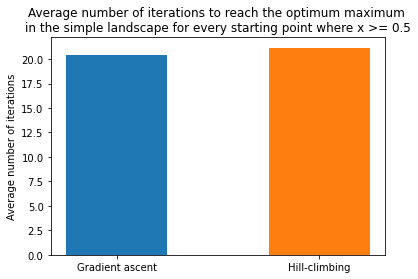

In [68]:
"""
mean number of iterations required for each algorithm in simple landscape
"""
samples = 10

xss = np.round(np.arange(0.5, 2, 0.05), 2)
yss = np.round(np.arange(-2, 2, 0.05), 2)
s = list(product(xss, yss))
ascent_mean = np.mean([GradAscent(start, 50, 0.1, 4,land='simple', plot=False)[1] 
                      for start in s])
        
hill_mean = np.mean([[HillClimb(start, 50, 1, 4, land='simple', plot=False)[1] 
                      for _ in range(samples)] for start in s])

plt.bar('Gradient ascent', ascent_mean, width=0.5)
plt.bar('Hill-climbing', hill_mean, width=0.5)
plt.ylabel('Average number of iterations')
plt.title('Average number of iterations to reach the optimum maximum \nin the simple landscape for every starting point where x >= 0.5')
plt.show()

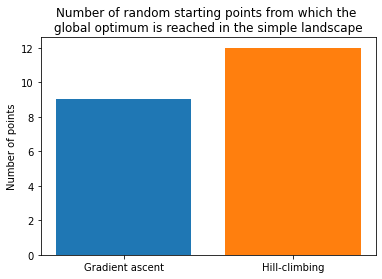

In [69]:
"""
mean number of iterations required for each algorithm in simple landscape
"""
xss = np.round(np.arange(-2, 2, 0.05), 2)
yss = np.round(np.arange(-2, 2, 0.05), 2)
points = list(product(xss, yss))
learn = 0.1
mut = 1
num_steps = 50
heights = np.array([SimpleLandscape(x,y) for x,y in points])
global_max = compute_max_min(SimpleLandscape, xs, ys, 'simple')[1]
# create 10 random points by calling numpy.random.choice
points = 20
random_points = [] 
for p in range(points):
  random_points.append(np.random.choice(xss, size=2, replace=False))

grad_as_values = []
hill_bl_values = []
for start in random_points:
  grad_as = GradAscent(start, num_steps, learn, global_max,land='simple', plot=False)
  if grad_as[0] == 1:
    grad_as_values.append(grad_as[0])
  
  hill_cl = HillClimb(start, num_steps, mut, global_max, land='simple', plot=False) 
  if hill_cl[0] == 1:
    hill_bl_values.append(hill_cl[0])

plt.bar('Gradient ascent', len(grad_as_values))
plt.bar('Hill-climbing', len(hill_bl_values))
plt.ylabel('Number of points')
plt.title('Number of random starting points from which the \nglobal optimum is reached in the simple landscape')
plt.show()

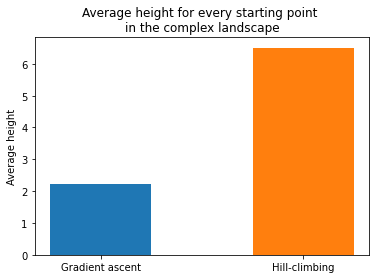

In [66]:
"""
height reached by each algorithm in complex landscape
"""
samples = 10
xss = np.round(np.arange(-3, 7, 0.25), 2)
yss = np.round(np.arange(-3, 7, 0.25), 2)
s = list(product(xss, yss))
ascent_mean = np.mean([GradAscent(start, 50, 0.1, 12, land='complex', plot=False)[1] 
                       for start in s])
        
hill_mean = np.mean([[HillClimb(start, 50, 1, 12, land='complex', plot=False)[1] 
                      for _ in range(samples)] for start in s])

plt.bar('Gradient ascent', ascent_mean, width=0.5)
plt.bar('Hill-climbing', hill_mean, width=0.5)
plt.ylabel('Average height')
plt.title('Average height for every starting point \nin the complex landscape')
plt.show()

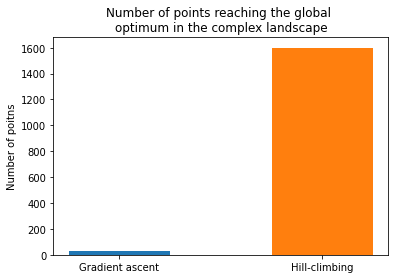

In [67]:
"""
points reaching the global maximum by each algorithm in complex landscape
"""
xss = np.round(np.arange(-3, 7, 0.25), 2)
yss = np.round(np.arange(-3, 7, 0.25), 2)
learn = 0.1
mut = 1
num_steps = 50
s = list(product(xss, yss))
heights = np.array([ComplexLandscape(x,y) for x,y in s])
global_max = compute_max_min(ComplexLandscape, xs, ys, 'complex')[1]
eps = 1

grad_complex = []
hill_complex = []
for start in s:
  grad_as = GradAscent(start, num_steps, learn, global_max,land='complex', plot=False)
  if grad_as[1] >= global_max - eps:
    grad_complex.append(grad_as[1])
  
  hill_cl = HillClimb(start, num_steps, mut, global_max, land='simple', plot=False) 
  if hill_cl[1] >= global_max - eps:
    hill_complex.append(hill_cl[1])

plt.bar('Gradient ascent', len(grad_complex), width=0.5)
plt.bar('Hill-climbing', len(hill_complex), width=0.5)
plt.ylabel('Number of poitns')
plt.title('Number of points reaching the global \noptimum in the complex landscape')
plt.show()

# Systematic test of each algorithm in each landscape

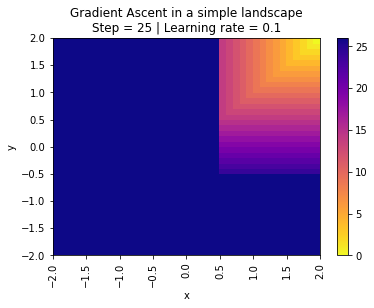

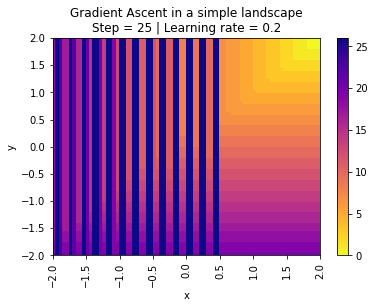

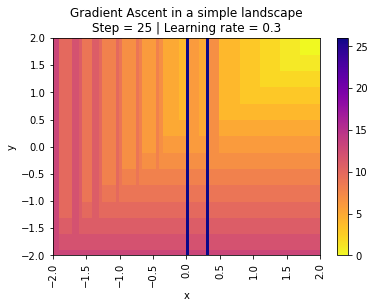

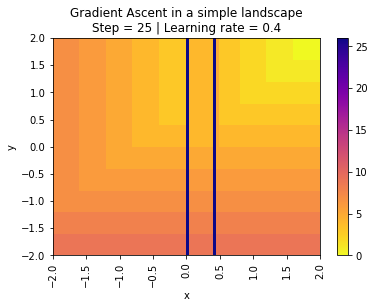

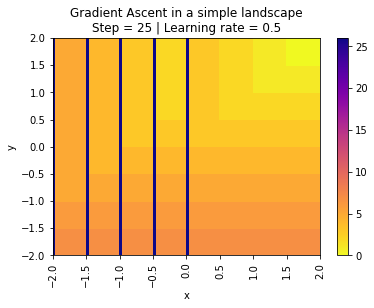

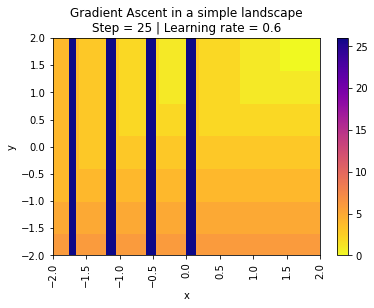

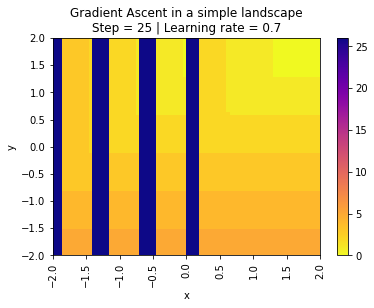

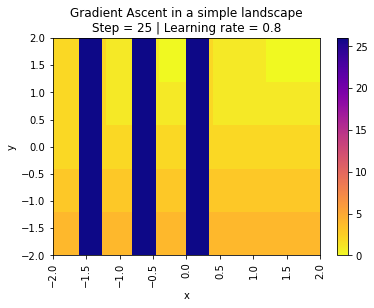

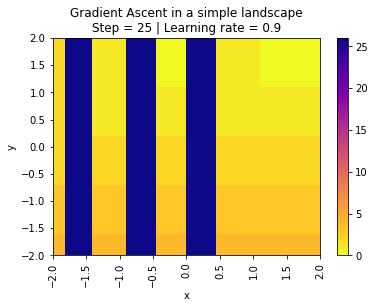

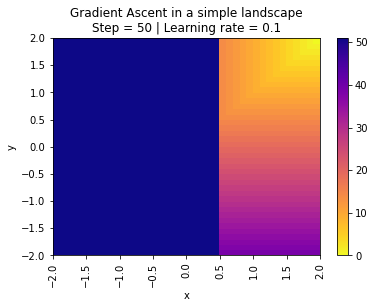

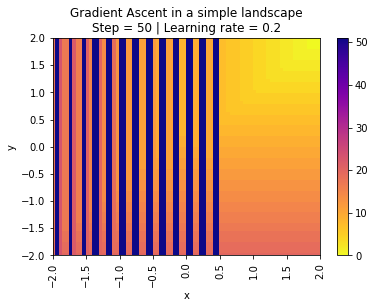

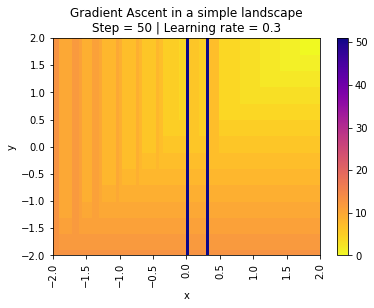

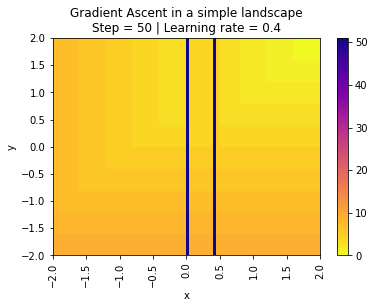

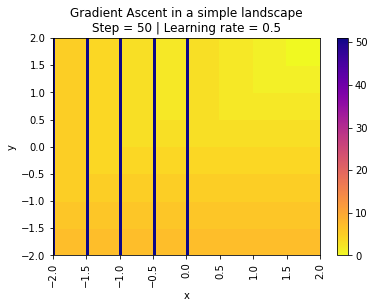

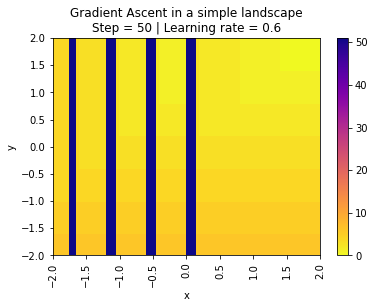

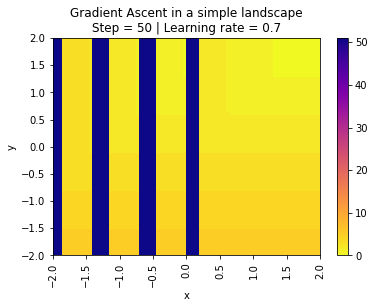

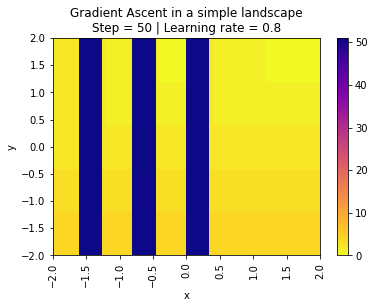

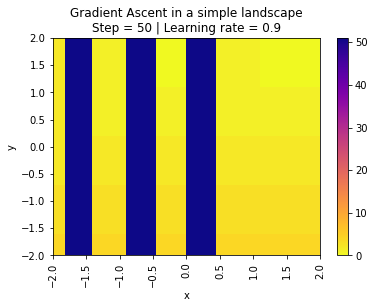

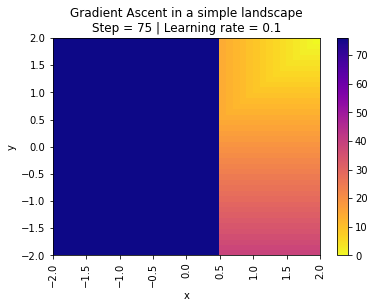

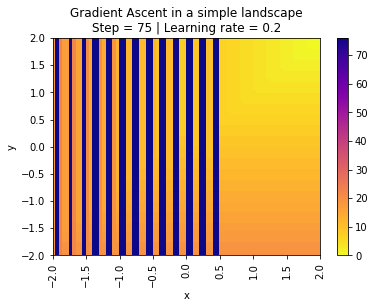

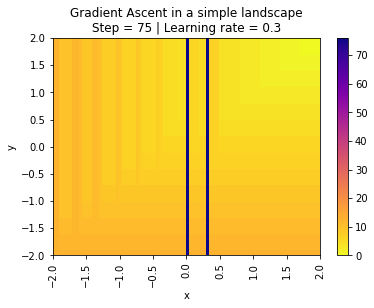

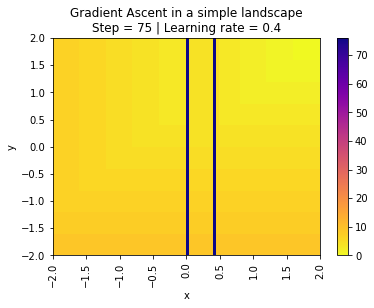

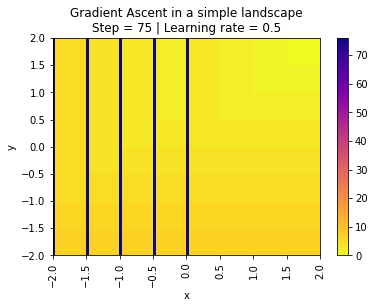

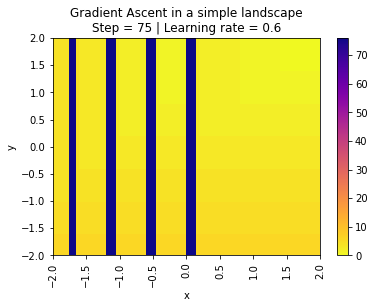

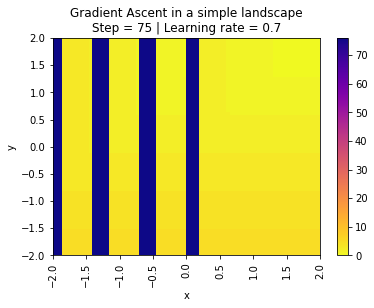

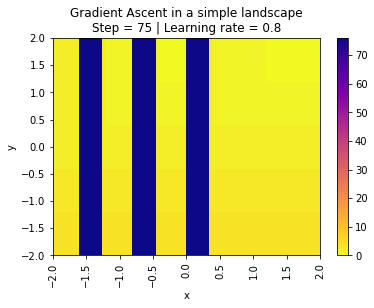

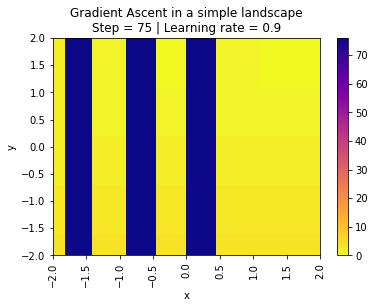

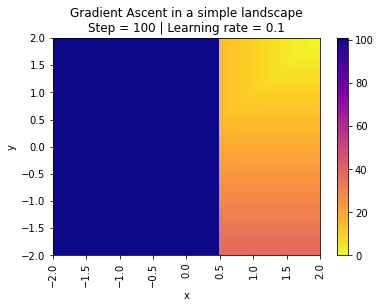

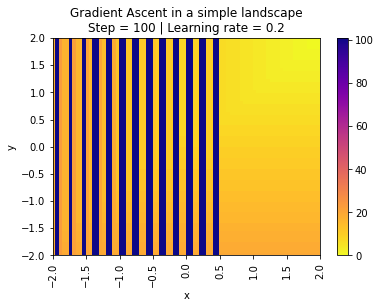

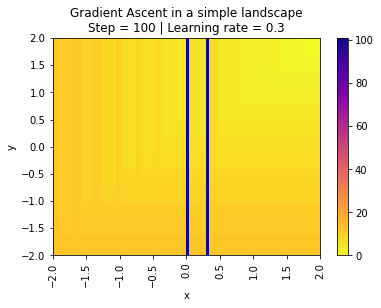

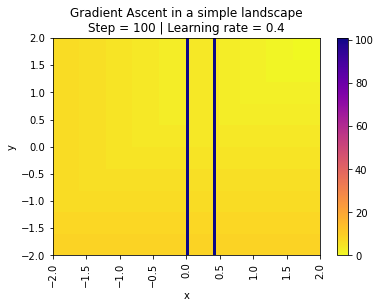

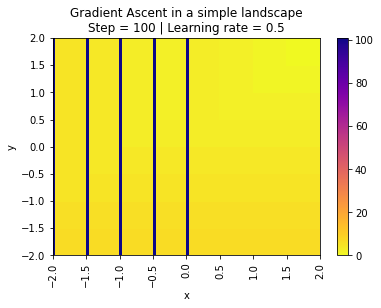

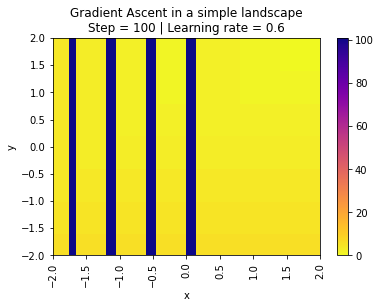

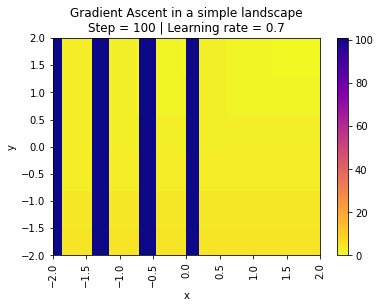

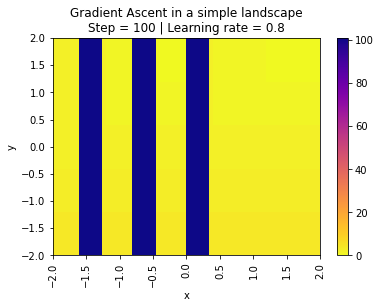

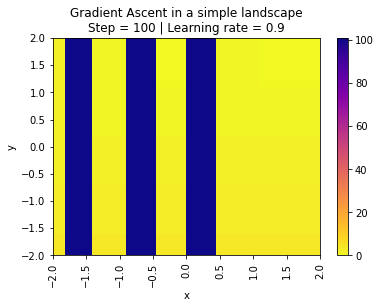

In [ ]:
"""
Results for the Gradient Ascent in the Simple Landscape
"""
f = GradAscent
num_steps = list(range(25, 125, 25))
learn_rates = np.round(np.arange(0.1, 0.91, 0.1), 2)
gradient_ascent_simple = show_results(f, num_steps, learn_rates, land='simple', plot=False)

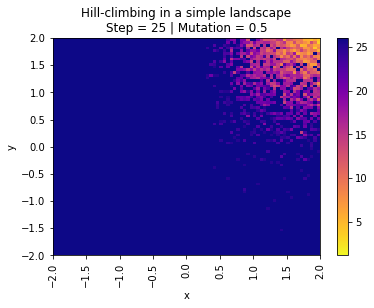

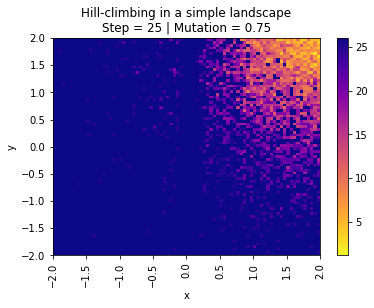

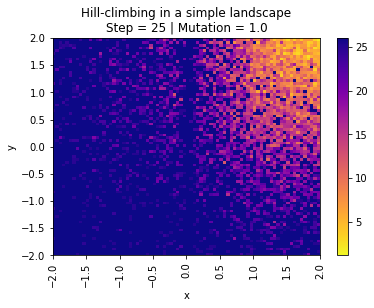

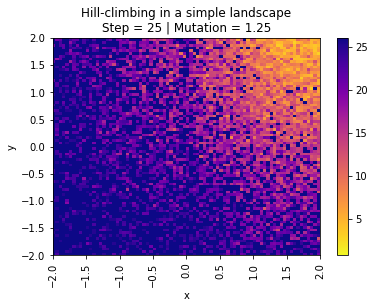

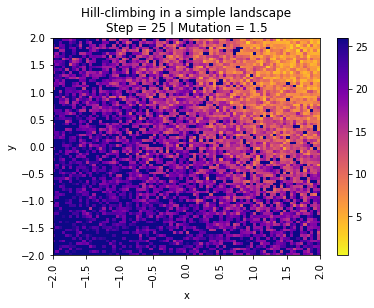

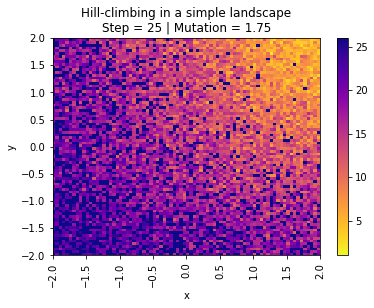

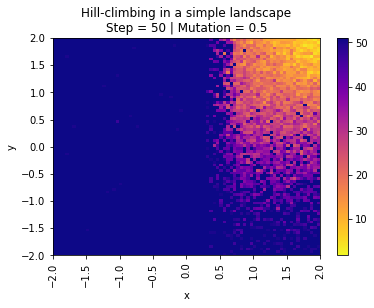

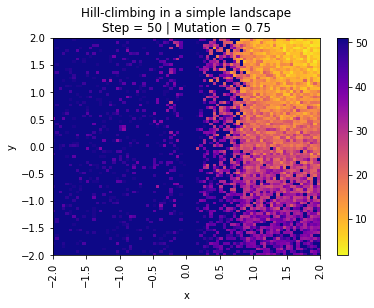

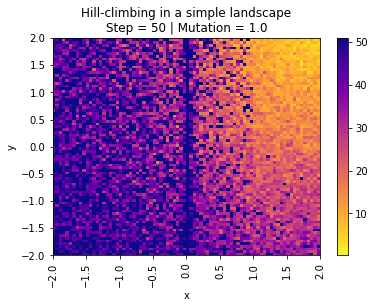

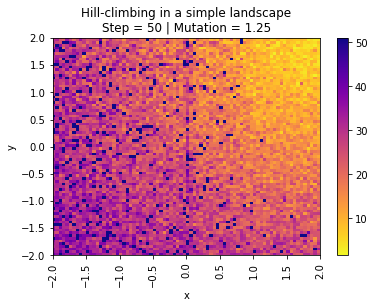

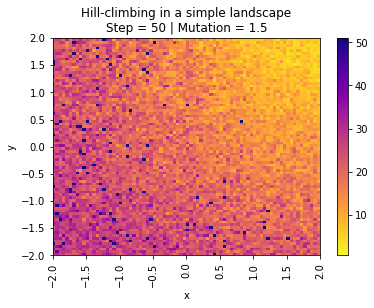

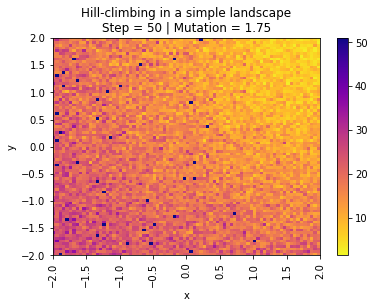

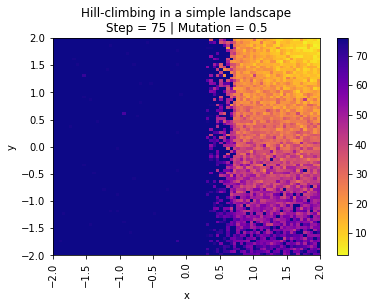

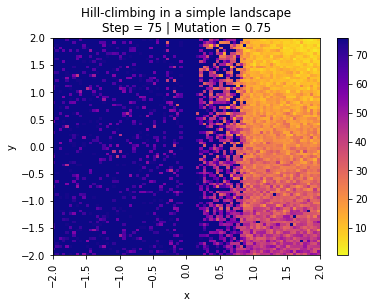

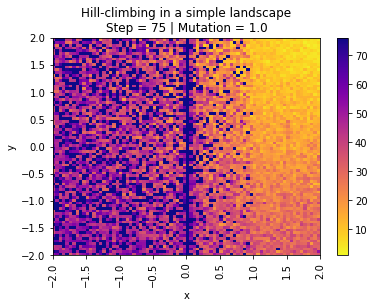

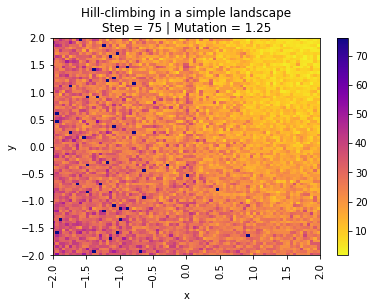

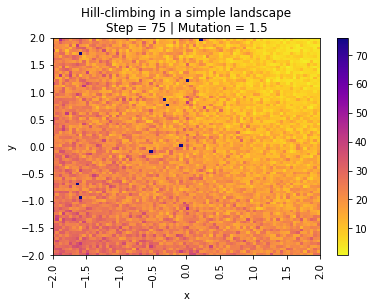

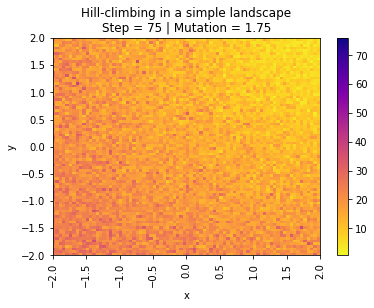

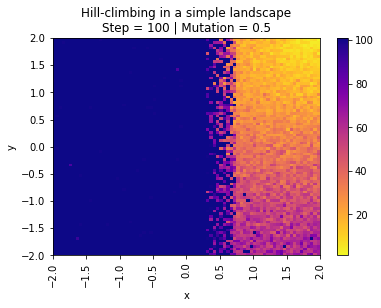

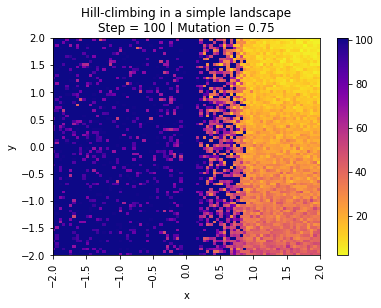

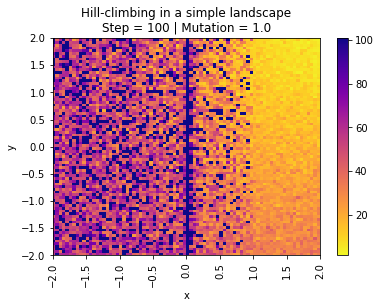

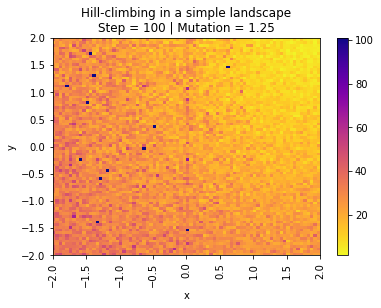

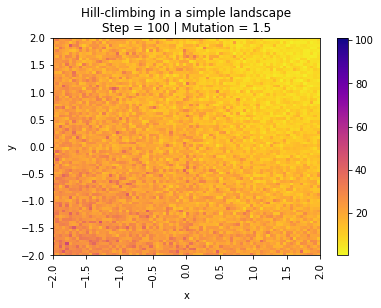

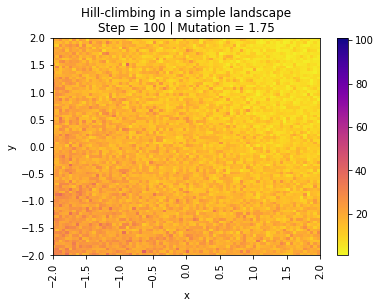

In [71]:
"""
Results for Hill-climbing in the Simple Landscape
"""
f = HillClimb
num_steps = list(range(25, 125, 25))
mutations = np.arange(0.5, 2, 0.25)
hill_climbing_simple = show_results(f, num_steps, mutations, land='simple', plot=False)

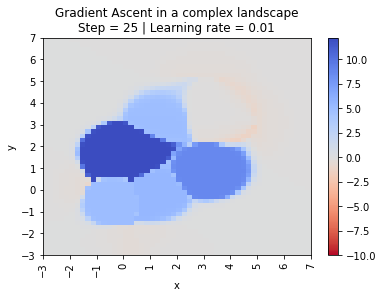

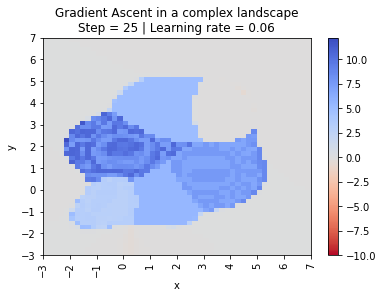

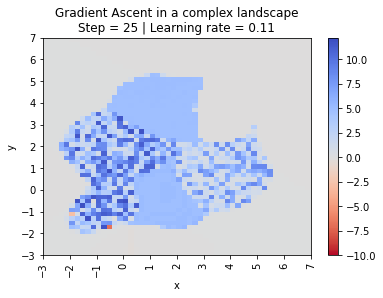

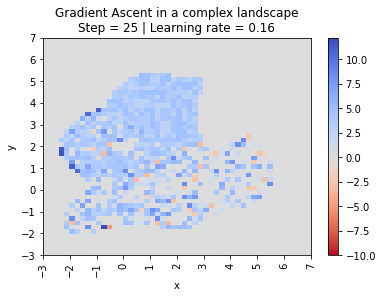

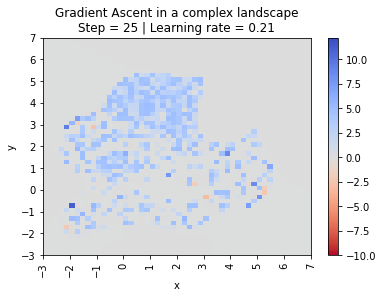

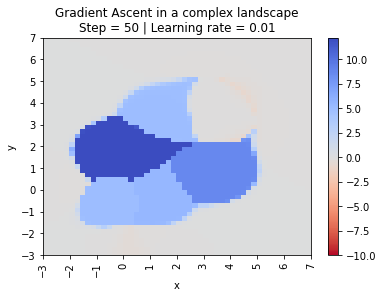

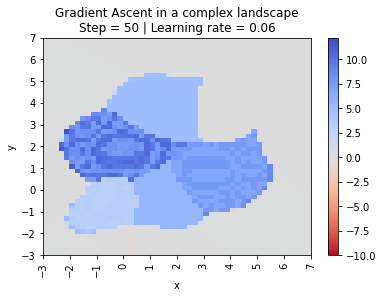

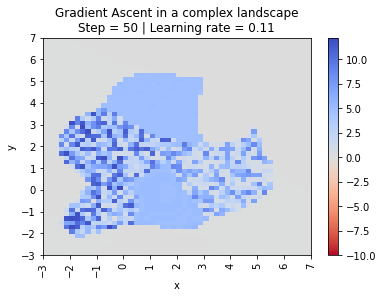

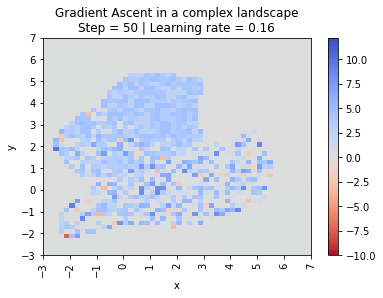

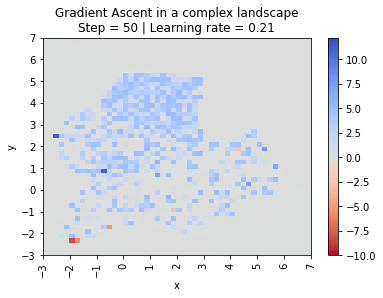

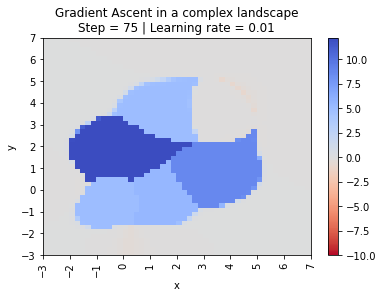

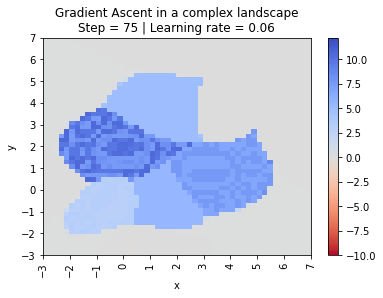

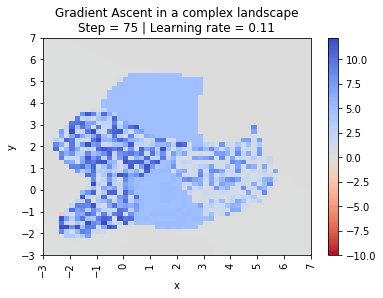

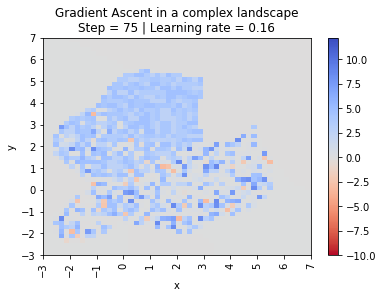

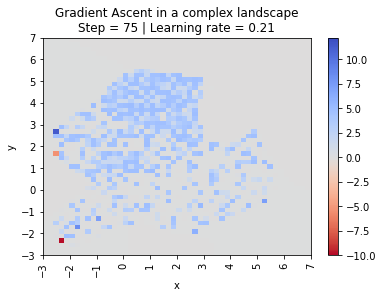

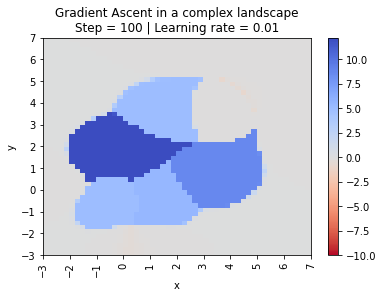

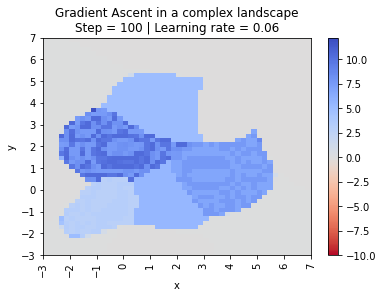

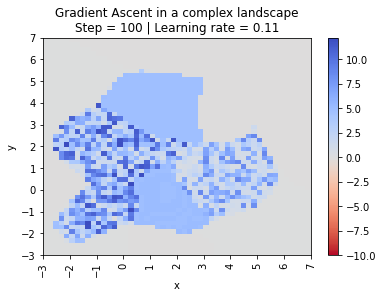

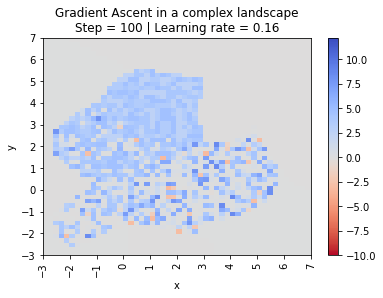

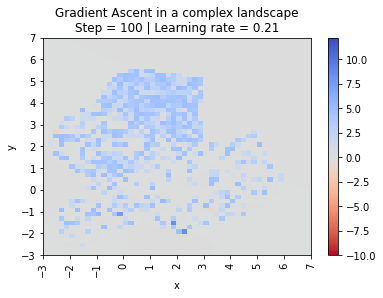

In [39]:
"""
Results for the Gradient Ascent in the Complex Landscape
"""
f = GradAscent
num_steps = list(range(25, 125, 25))
learn_rates = np.round(np.arange(0.01, 0.25, 0.05), 2)
gradient_ascent_complex = show_results(f, num_steps, learn_rates, land='complex', plot=False)

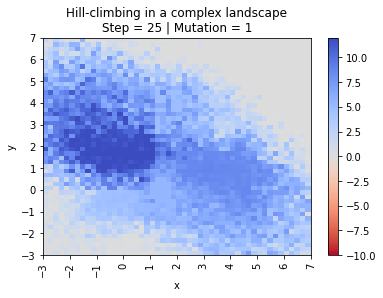

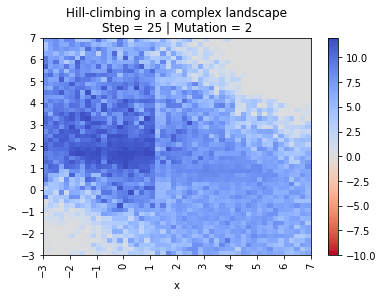

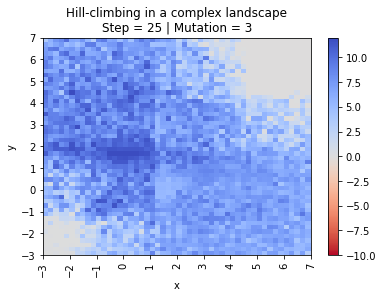

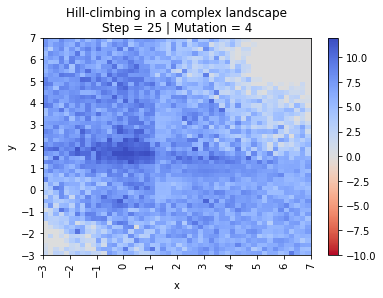

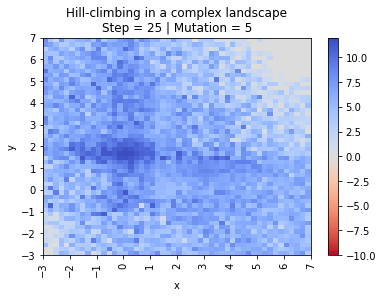

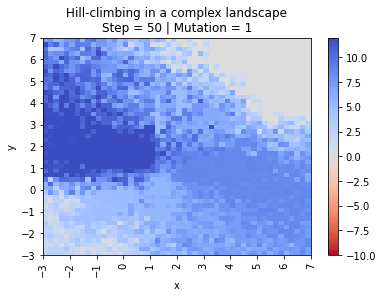

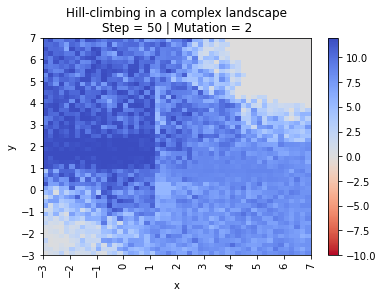

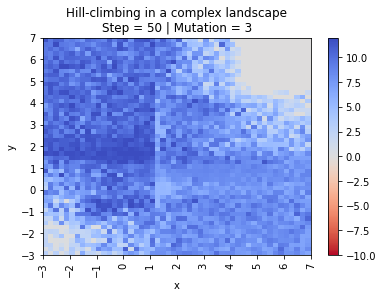

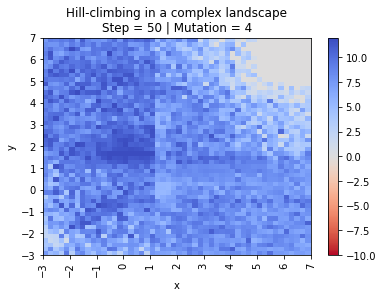

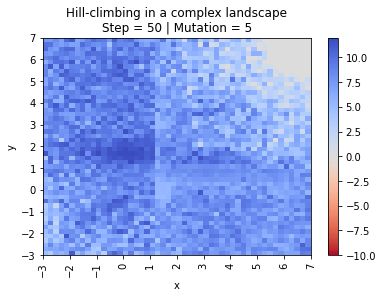

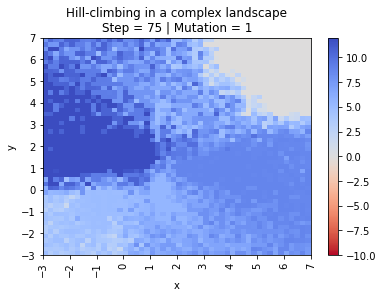

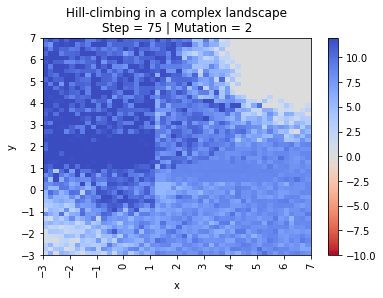

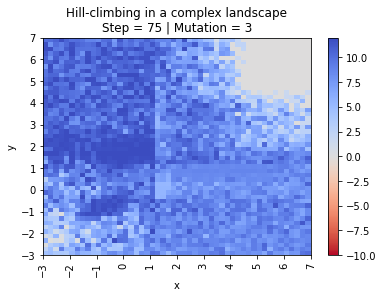

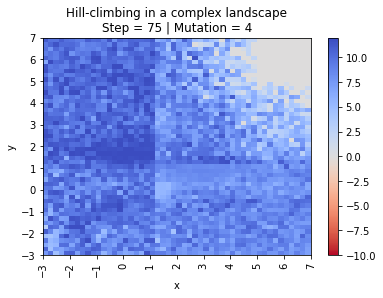

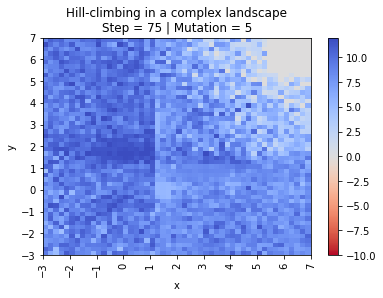

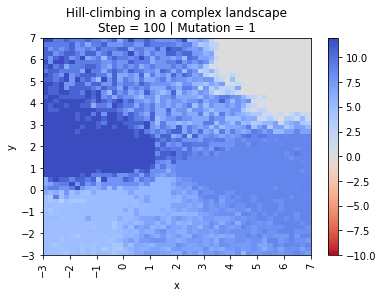

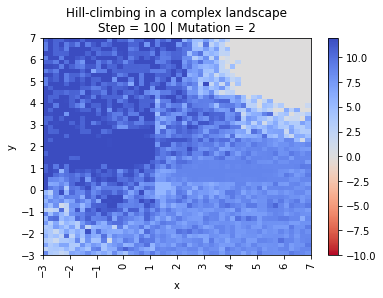

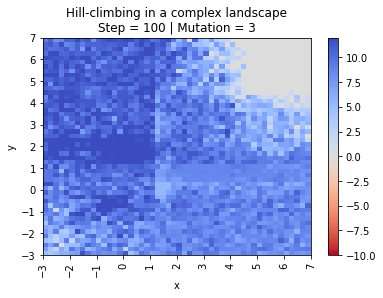

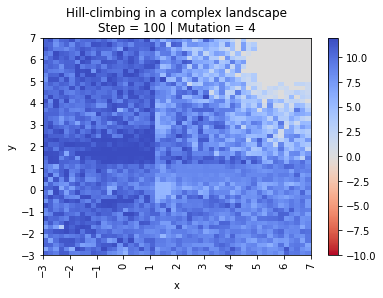

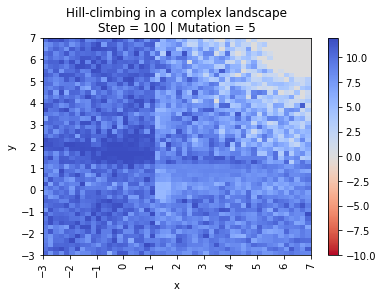

In [ ]:
"""
Results for the Hill-climbing in the Complex Landscape
"""
f = HillClimb
num_steps = list(range(25, 125, 25))
mutations = list(range(1, 6, 1))
hill_climbing_complex = show_results(f, num_steps, mutations, land='complex', plot=False)